In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/voter-survey-december16.csv')

In [3]:
pattern = '(imiss_).{1}(_2016)'
def return_imiss_cols(df):
    imiss_cols = []
    for col in df.columns:
        if re.search(pattern, col):
            imiss_cols.append(col)
    return imiss_cols

# issue column list
imiss_col_list = return_imiss_cols(df)

In [4]:
# target column list  
target_col_list = ['pid3_2016']
df_target = df[target_col_list]

In [5]:
df_issue = df[imiss_col_list].fillna(0)

In [6]:
df_issue = df_issue.astype(str)
df_issue = df_issue.join(df_target)

In [7]:
df_dummies = pd.get_dummies(df_issue)

In [9]:
df_dummies.corr()['pid3_2016'].abs().sort_values(ascending=False)

pid3_2016           1.000000
imiss_y_2016_1.0    0.257273
imiss_l_2016_1.0    0.250949
imiss_d_2016_1.0    0.232526
imiss_x_2016_1.0    0.225424
imiss_u_2016_1.0    0.213730
imiss_l_2016_4.0    0.211628
imiss_g_2016_1.0    0.210702
imiss_q_2016_1.0    0.182952
imiss_p_2016_1.0    0.173386
imiss_i_2016_1.0    0.171412
imiss_s_2016_1.0    0.161111
imiss_y_2016_4.0    0.160913
imiss_g_2016_4.0    0.160191
imiss_u_2016_3.0    0.152435
imiss_j_2016_1.0    0.145084
imiss_d_2016_3.0    0.143193
imiss_i_2016_3.0    0.137929
imiss_x_2016_3.0    0.131625
imiss_l_2016_3.0    0.129721
imiss_y_2016_3.0    0.129094
imiss_j_2016_2.0    0.126854
imiss_m_2016_1.0    0.125420
imiss_s_2016_2.0    0.124386
imiss_x_2016_4.0    0.120866
imiss_p_2016_3.0    0.117345
imiss_m_2016_2.0    0.111619
imiss_q_2016_2.0    0.109102
imiss_h_2016_1.0    0.106259
imiss_d_2016_4.0    0.103287
                      ...   
imiss_o_2016_1.0    0.012891
imiss_e_2016_2.0    0.011603
imiss_a_2016_4.0    0.011417
imiss_b_2016_1

In [10]:
df_dummies.shape

(8000, 116)

In [12]:
df_predictors = df_dummies.drop('pid3_2016', axis=1)

In [13]:
df_predictors.head()

,imiss_a_2016_0.0,imiss_a_2016_1.0,imiss_a_2016_2.0,imiss_a_2016_3.0,imiss_a_2016_4.0,imiss_b_2016_0.0,imiss_b_2016_1.0,imiss_b_2016_2.0,imiss_b_2016_3.0,imiss_b_2016_4.0,...,imiss_x_2016_0.0,imiss_x_2016_1.0,imiss_x_2016_2.0,imiss_x_2016_3.0,imiss_x_2016_4.0,imiss_y_2016_0.0,imiss_y_2016_1.0,imiss_y_2016_2.0,imiss_y_2016_3.0,imiss_y_2016_4.0
0,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0


## K means clustering

In [14]:
X = df_predictors

In [15]:
from sklearn.cluster import KMeans
from sklearn import metrics 
from sklearn.model_selection import train_test_split

In [16]:
k_means = KMeans(n_clusters=2)
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [17]:
labels = k_means.labels_

In [18]:
y_pred = k_means.predict(X)

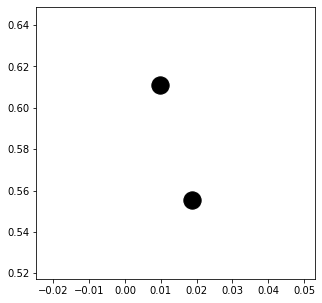

In [19]:
plt.figure(figsize=(5,5))
cl_centers = k_means.cluster_centers_
plt.scatter(cl_centers[:, 0], cl_centers[:, 1], c='black', s=300)

In [20]:
metrics.silhouette_score(X, labels, metric='euclidean')

0.09122085678832324

In [22]:
metrics.calinski_harabasz_score(X, labels)

836.4895570763003

In [23]:
df_target = df[target_col_list]
print(df_target.shape)
df_target_arr = np.ravel(df_target)

(8000, 1)


In [24]:
df_target_arr
y_pred.shape

(8000,)

In [25]:
dataset = pd.DataFrame({ 'y_pred': y_pred}, 
                        columns=[ 'y_pred']
                        )

In [26]:
dataset.head()

,y_pred
0,0
1,1
2,0
3,1
4,0


In [27]:
target_pred_df = df_predictors.join(df_target).join(dataset)
target_pred_df.head(10)

,imiss_a_2016_0.0,imiss_a_2016_1.0,imiss_a_2016_2.0,imiss_a_2016_3.0,imiss_a_2016_4.0,imiss_b_2016_0.0,imiss_b_2016_1.0,imiss_b_2016_2.0,imiss_b_2016_3.0,imiss_b_2016_4.0,...,imiss_x_2016_2.0,imiss_x_2016_3.0,imiss_x_2016_4.0,imiss_y_2016_0.0,imiss_y_2016_1.0,imiss_y_2016_2.0,imiss_y_2016_3.0,imiss_y_2016_4.0,pid3_2016,y_pred
0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,2,1
2,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,3,0
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,3,1
4,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,2,0
5,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
6,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
7,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,2,1
8,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
9,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [29]:

count = 0
for row in target_pred_df.itertuples():
    if (row.pid3_2016 == 2): #and (row.y_pred == 0):
        count +=1
print(count)


2340


## Logistic regression

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [31]:
X = df_predictors
y = df_target
X.head()

,imiss_a_2016_0.0,imiss_a_2016_1.0,imiss_a_2016_2.0,imiss_a_2016_3.0,imiss_a_2016_4.0,imiss_b_2016_0.0,imiss_b_2016_1.0,imiss_b_2016_2.0,imiss_b_2016_3.0,imiss_b_2016_4.0,...,imiss_x_2016_0.0,imiss_x_2016_1.0,imiss_x_2016_2.0,imiss_x_2016_3.0,imiss_x_2016_4.0,imiss_y_2016_0.0,imiss_y_2016_1.0,imiss_y_2016_2.0,imiss_y_2016_3.0,imiss_y_2016_4.0
0,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [32]:
X.isna().sum().any()
y.isna().sum()

pid3_2016    0
dtype: int64

In [33]:
y = y.fillna(0)
y = np.ravel(y)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.2, 
                                                    stratify=y)

In [35]:
lr = LogisticRegression(C=2, penalty='l2', 
                        solver='lbfgs', 
                        multi_class='auto', 
                        max_iter=1000)
lr.fit(X_train, y_train)
y_pred_test = lr.predict(X_test)

In [36]:
df_target.columns

Index(['pid3_2016'], dtype='object')

In [39]:
cm = confusion_matrix(y_test, y_pred_test)
conf_matrix = pd.DataFrame(cm, index=['0','1','2','3','4'], 
                           columns=['0','1','2','3','4'])


conf_matrix

,0,1,2,3,4
0,481,22,71,0,2
1,63,300,100,5,0
2,177,206,111,4,0
3,17,13,8,0,0
4,9,5,6,0,0


In [42]:
# correct 
correct = cm[1][1]
total = sum(cm[1])
pred_correct = correct/total
pred_correct

0.6410256410256411

In [43]:
# correct 
correct = cm[2][2]
total = sum(cm[2])
pred_correct = correct/total
pred_correct

0.22289156626506024

In [44]:
len(lr.coef_[1])

115

In [39]:
coef_dict = dict(zip(X.columns, lr.coef_[0]))
coef_dict

{'imiss_a_2016_0.0': -0.10404943923081895,
 'imiss_a_2016_1.0': 0.24291226743981922,
 'imiss_a_2016_2.0': 0.052454660109609245,
 'imiss_a_2016_3.0': -0.29717277119798446,
 'imiss_a_2016_4.0': 0.10704905782829288,
 'imiss_b_2016_0.0': -0.4615256539571386,
 'imiss_b_2016_1.0': -0.30731225914731,
 'imiss_b_2016_2.0': 0.05347887370036297,
 'imiss_b_2016_3.0': 0.4948771019259455,
 'imiss_b_2016_4.0': 0.2216757124270555,
 'imiss_c_2016_0.0': 0.19465896217776532,
 'imiss_c_2016_1.0': 0.08635564123587226,
 'imiss_c_2016_2.0': -0.3811358771341699,
 'imiss_c_2016_3.0': -0.233542956069862,
 'imiss_c_2016_4.0': 0.334858004739315,
 'imiss_d_2016_0.0': -0.29704777907230845,
 'imiss_d_2016_1.0': 0.28875836727032816,
 'imiss_d_2016_2.0': 0.0569467081474142,
 'imiss_d_2016_3.0': -0.025042447137693945,
 'imiss_d_2016_4.0': -0.02242107425882628,
 'imiss_e_2016_0.0': -0.12026786799092809,
 'imiss_e_2016_1.0': -0.23658352569064514,
 'imiss_e_2016_2.0': 0.09550461315036,
 'imiss_e_2016_3.0': -0.021583057925

## Feature importance

In [45]:
from sklearn.feature_selection import RFE
predictors = X_train
selector = RFE(lr, n_features_to_select=1)
selector = selector.fit(predictors, y_train)

In [46]:
len(X_train.columns)

115

In [47]:
order = selector.ranking_
len(order)
order

array([102,  59,  60,  92,  15,  46,  29,  30,  67,   2,  34,  57,  52,
       103,  35,  69,  39, 115, 100,  86,  36,  83,  82,  48,  10,  12,
        13,  14,  44,  71,  64,  16, 114,  41,  65,  28,  98,  99,  97,
        18,  95,  37,  87,   7, 108,  76,  74, 113,  31,  21,  58,  54,
        85,  27, 109,  43,  38,   6,   3,   1, 101,  25, 105, 112,  79,
        55,  88,  89,  42,  11,  22,   8,   9,  40,  20,  45,  56,  75,
       104,   4,  50,  96,  81,  80, 107,  68,  61,  93,  33,  19,  63,
        53,  94,  73,  24,  51,  91, 110, 111,  78,  49,  23,  26,  70,
        32,  77,  47, 106,  72,  17,   5,  84,  90,  66,  62])

In [48]:
df_predictors.columns

Index(['imiss_a_2016_0.0', 'imiss_a_2016_1.0', 'imiss_a_2016_2.0',
       'imiss_a_2016_3.0', 'imiss_a_2016_4.0', 'imiss_b_2016_0.0',
       'imiss_b_2016_1.0', 'imiss_b_2016_2.0', 'imiss_b_2016_3.0',
       'imiss_b_2016_4.0',
       ...
       'imiss_x_2016_0.0', 'imiss_x_2016_1.0', 'imiss_x_2016_2.0',
       'imiss_x_2016_3.0', 'imiss_x_2016_4.0', 'imiss_y_2016_0.0',
       'imiss_y_2016_1.0', 'imiss_y_2016_2.0', 'imiss_y_2016_3.0',
       'imiss_y_2016_4.0'],
      dtype='object', length=115)

In [49]:
for i in df_predictors.index:
    rank = np.array(order)
    feat = np.array(df_predictors.columns)
    rank_feat = pd.DataFrame(rank,feat, columns=['rank'])

In [51]:
rank_feat.sort_values(by='rank').head(10)

,rank
imiss_l_2016_4.0,1
imiss_b_2016_4.0,2
imiss_l_2016_3.0,3
imiss_p_2016_4.0,4
imiss_y_2016_0.0,5
imiss_l_2016_2.0,6
imiss_i_2016_3.0,7
imiss_o_2016_1.0,8
imiss_o_2016_2.0,9
imiss_e_2016_4.0,10


## Cross-validation

In [52]:
from sklearn.model_selection import cross_val_score

In [56]:
X.isna().sum().any()

False

In [57]:
y = np.ravel(y)
y.shape

(8000,)

In [58]:
scores = cross_val_score(lr, X, y, cv=5)

In [59]:
scores

array([0.60149906, 0.565625  , 0.57125   , 0.535     , 0.54346467])